<a href="https://colab.research.google.com/github/Hafidahmad11/Clustering/blob/main/Tubes1Clustering_1301194235.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# **Unduh** File Csv

In [ ]:
!gdown --id 17aM95b9gQKR2RbMxzOd1DVgyaL7C-qq3 

#upload file excel(csv) kendaraan_test

Downloading...
From: https://drive.google.com/uc?id=17aM95b9gQKR2RbMxzOd1DVgyaL7C-qq3
To: /content/kendaraan_test.csv
100% 2.31M/2.31M [00:00<00:00, 73.9MB/s]


In [ ]:
!gdown --id 1BRl5PcnsUTgjYolmnF7B7Jm5ezTSwpbA

#upload file excel(csv) kendaraan_train

Downloading...
From: https://drive.google.com/uc?id=1BRl5PcnsUTgjYolmnF7B7Jm5ezTSwpbA
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 134MB/s]


In [ ]:
kendaraan_test = pd.read_csv('kendaraan_test.csv')

In [ ]:
kendaraan_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


Kendaraan_train

In [ ]:
kendaraan_train = pd.read_csv('kendaraan_train.csv')

In [ ]:
kendaraan_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


Missing Value untuk kendaraan_test

In [ ]:
#menghitng missing value
#kendaraan_test

kendaraan_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

Missing value untuk kendaraan_train

In [ ]:
#enghitung missing value
#kendaraan_train
kendaraan_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

# Eksplorasi & Persiapan dataset Concat

Concat atau penggabungan kedua file/dataset

In [ ]:
ConcatDataset = pd.concat([kendaraan_test, kendaraan_train])

In [ ]:
ConcatDataset

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,id
0,Wanita,49.0,1.0,8.0,0.0,1-2 Tahun,Pernah,46963.0,26.0,145.0,0,NaN
1,Pria,22.0,1.0,47.0,1.0,< 1 Tahun,Tidak,39624.0,152.0,241.0,0,NaN
2,Pria,24.0,1.0,28.0,1.0,< 1 Tahun,Tidak,110479.0,152.0,62.0,0,NaN
3,Pria,46.0,1.0,8.0,1.0,1-2 Tahun,Tidak,36266.0,124.0,34.0,0,NaN
4,Pria,35.0,1.0,23.0,0.0,1-2 Tahun,Pernah,26963.0,152.0,229.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0,285827.0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0,285828.0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0,285829.0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0,285830.0


In [ ]:
ConcatDataset.drop(['id', 'Tertarik', 'Kanal_Penjualan'], axis=1, inplace=True)

In [ ]:
ConcatDataset.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Lama_Berlangganan
0,Wanita,49.0,1.0,8.0,0.0,1-2 Tahun,Pernah,46963.0,145.0
1,Pria,22.0,1.0,47.0,1.0,< 1 Tahun,Tidak,39624.0,241.0
2,Pria,24.0,1.0,28.0,1.0,< 1 Tahun,Tidak,110479.0,62.0
3,Pria,46.0,1.0,8.0,1.0,1-2 Tahun,Tidak,36266.0,34.0
4,Pria,35.0,1.0,23.0,0.0,1-2 Tahun,Pernah,26963.0,229.0
5,Pria,26.0,1.0,28.0,1.0,< 1 Tahun,Tidak,42721.0,198.0
6,Wanita,24.0,1.0,28.0,1.0,< 1 Tahun,Tidak,65801.0,160.0
7,Wanita,40.0,1.0,28.0,0.0,1-2 Tahun,Pernah,30981.0,79.0
8,Pria,23.0,1.0,15.0,1.0,< 1 Tahun,Tidak,32365.0,219.0
9,Wanita,43.0,1.0,28.0,0.0,1-2 Tahun,Pernah,65380.0,41.0


Melihat dimensi data

In [ ]:
ConcatDataset.shape

(333470, 9)

Statistical summary

In [ ]:
ConcatDataset.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Lama_Berlangganan
count,319256.000000,319066.000000,319164.000000,319241.000000,318901.000000,319478.000000
mean,38.840028,0.997859,26.394380,0.458603,30550.097899,154.310350
std,15.526398,0.046217,13.246852,0.498284,17192.548724,83.686932
min,20.000000,0.000000,0.000000,0.000000,2630.000000,10.000000
25%,25.000000,1.000000,15.000000,0.000000,24397.000000,82.000000
50%,36.000000,1.000000,28.000000,0.000000,31660.000000,154.000000
75%,49.000000,1.000000,35.000000,1.000000,39392.000000,227.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,299.000000


Missing value untuk dataset yang telah di concat atau gabung

In [ ]:
ConcatDataset.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Lama_Berlangganan    13992
dtype: int64

Hapus baris yang memiliki missing value atau nilai Null

In [ ]:
ConcatDataset = ConcatDataset.dropna()
ConcatDataset.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Lama_Berlangganan    0
dtype: int64

In [ ]:
ConcatDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227748 entries, 0 to 285830
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      227748 non-null  object 
 1   Umur               227748 non-null  float64
 2   SIM                227748 non-null  float64
 3   Kode_Daerah        227748 non-null  float64
 4   Sudah_Asuransi     227748 non-null  float64
 5   Umur_Kendaraan     227748 non-null  object 
 6   Kendaraan_Rusak    227748 non-null  object 
 7   Premi              227748 non-null  float64
 8   Lama_Berlangganan  227748 non-null  float64
dtypes: float64(6), object(3)
memory usage: 17.4+ MB


Encode dataset

In [ ]:
encoder = LabelEncoder()

ConcatDataset['Jenis_Kelamin'] = encoder.fit_transform(ConcatDataset['Jenis_Kelamin'])
ConcatDataset['Umur_Kendaraan'] = encoder.fit_transform(ConcatDataset['Umur_Kendaraan'])
ConcatDataset['Kendaraan_Rusak'] = encoder.fit_transform(ConcatDataset['Kendaraan_Rusak'])

#normalisasi ConcatDataset

scaler = MinMaxScaler()

ConcatDataset[['Premi']] = scaler.fit_transform(ConcatDataset[['Premi']])
ConcatDataset[['Kode_Daerah']] = scaler.fit_transform(ConcatDataset[['Kode_Daerah']])

ConcatDataset.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Lama_Berlangganan
0,1,49.0,1.0,0.153846,0.0,0,0,0.082475,145.0
1,0,22.0,1.0,0.903846,1.0,1,1,0.068822,241.0
2,0,24.0,1.0,0.538462,1.0,1,1,0.200636,62.0
3,0,46.0,1.0,0.153846,1.0,0,1,0.062575,34.0
4,0,35.0,1.0,0.442308,0.0,0,0,0.045268,229.0
5,0,26.0,1.0,0.538462,1.0,1,1,0.074583,198.0
6,1,24.0,1.0,0.538462,1.0,1,1,0.117520,160.0
7,1,40.0,1.0,0.538462,0.0,0,0,0.052743,79.0
8,0,23.0,1.0,0.288462,1.0,1,1,0.055317,219.0
9,1,43.0,1.0,0.538462,0.0,0,0,0.116737,41.0


# Visualisasi Data

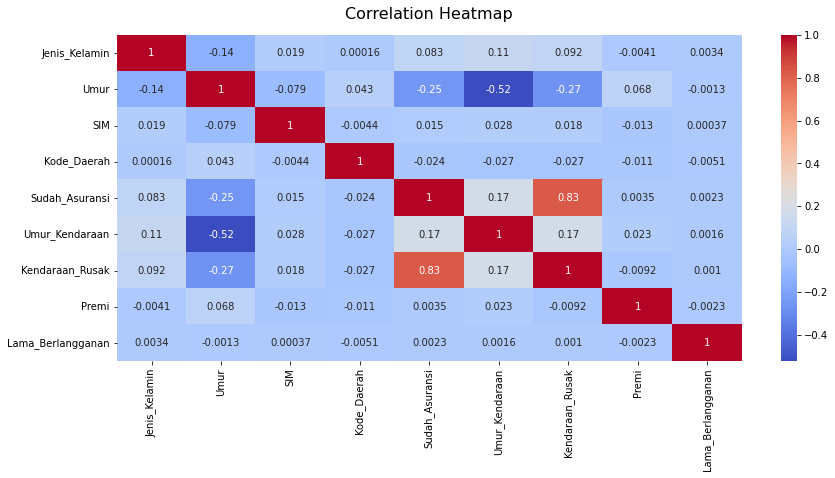

In [ ]:
plt.subplots(figsize=(14,6))
heatmap = sns.heatmap(ConcatDataset.corr(), annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)
plt.show()

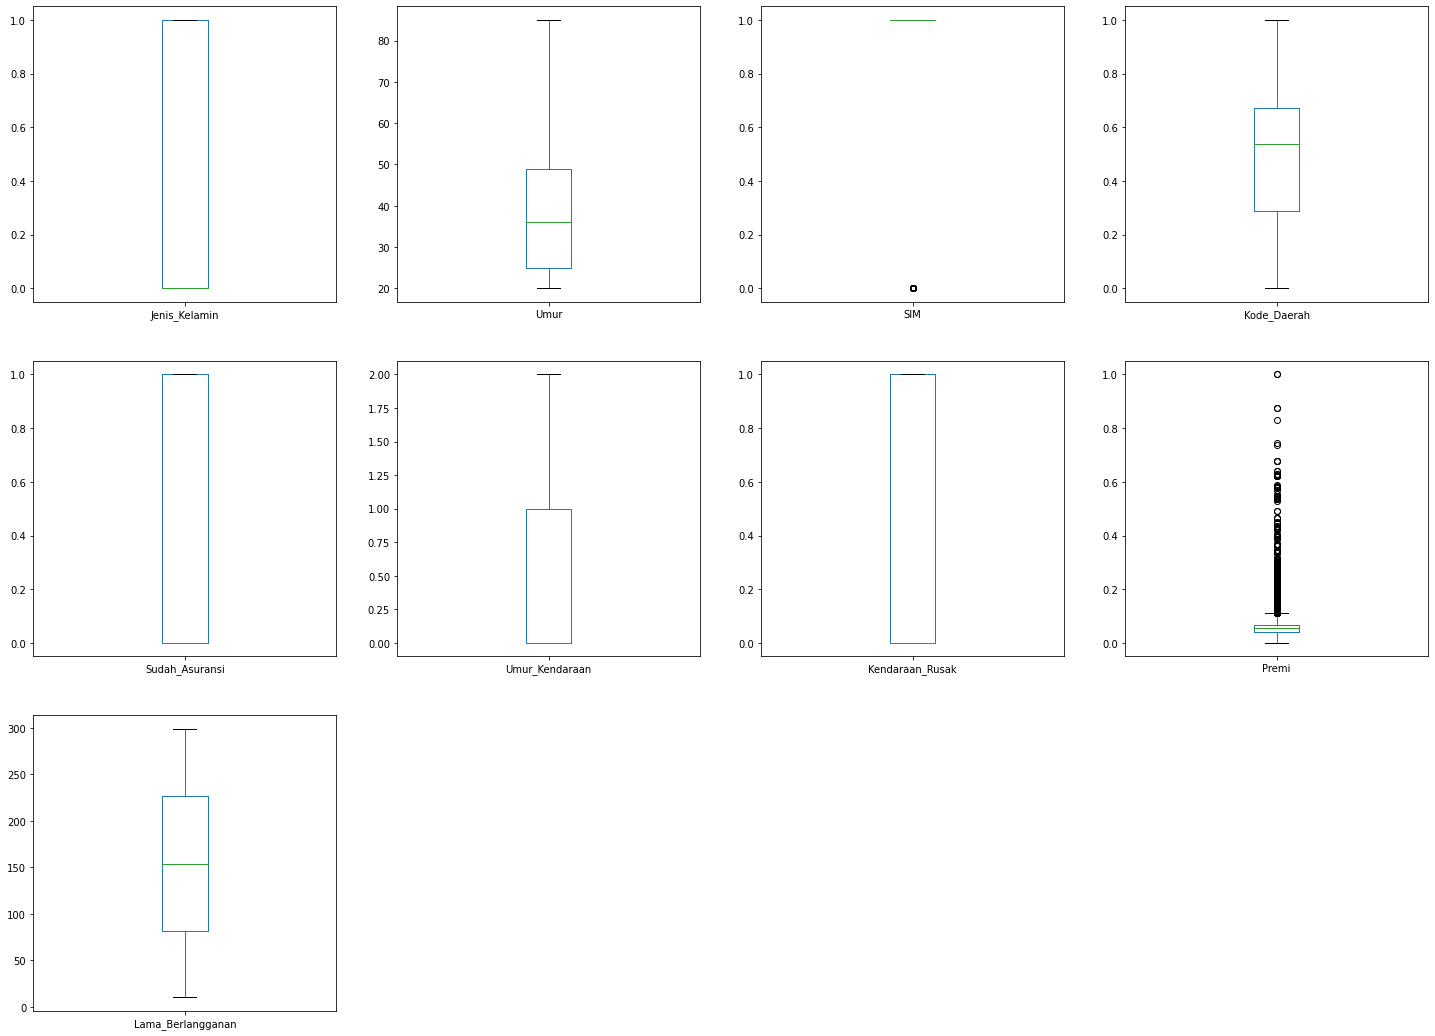

In [ ]:
ConcatDataset.plot(kind="box", subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(25,25))
plt.show()

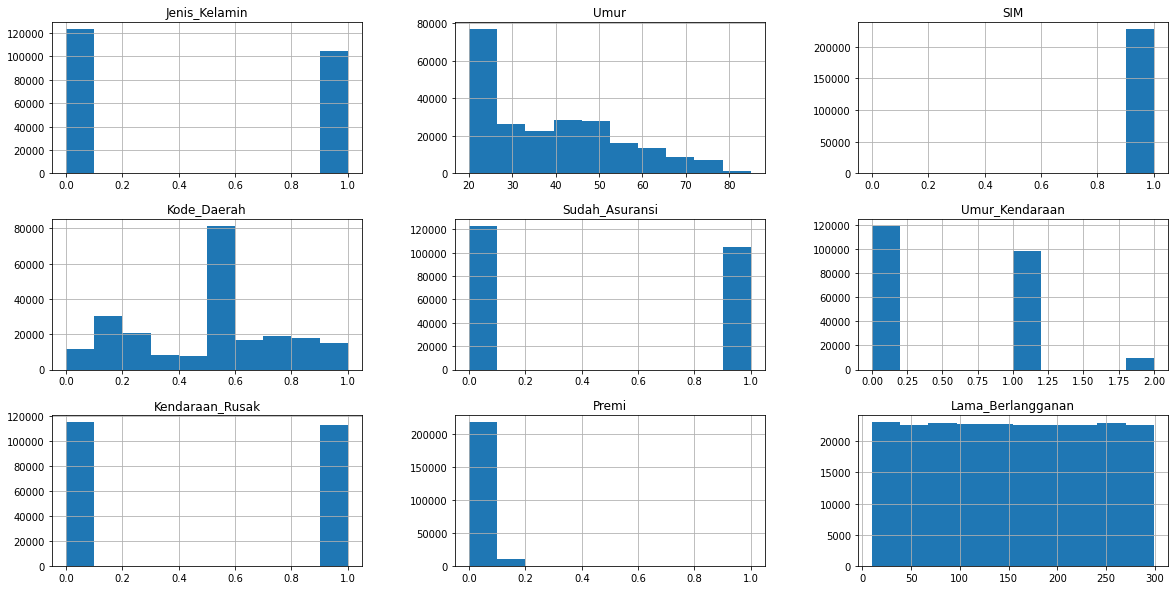

In [ ]:
ConcatDataset.hist(figsize=(20,10))
plt.show()

# Seleksi Fitur

In [ ]:
#mengukur kekuatan dan arah hubungan linier dari dua variabel 

def corel(ConcatDataset, threshold):

    corr = ConcatDataset.corr().abs()
    keep = []
    for i in range(len(corr.iloc[:,0])):
        above = corr.iloc[:i,i]
        if len(keep) > 0: above = above[keep]
        if len(above[above < threshold]) == len(above):
            keep.append(corr.columns.values[i])

    return ConcatDataset[keep]

In [ ]:
feature_selection = corel(ConcatDataset, 0.5)
feature_selection

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Lama_Berlangganan
0,1,49.0,1.0,0.153846,0.0,0.082475,145.0
1,0,22.0,1.0,0.903846,1.0,0.068822,241.0
2,0,24.0,1.0,0.538462,1.0,0.200636,62.0
3,0,46.0,1.0,0.153846,1.0,0.062575,34.0
4,0,35.0,1.0,0.442308,0.0,0.045268,229.0
...,...,...,...,...,...,...,...
285826,1,23.0,1.0,0.076923,1.0,0.043454,217.0
285827,1,21.0,1.0,0.884615,1.0,0.078239,50.0
285828,1,23.0,1.0,0.961538,1.0,0.087661,226.0
285829,0,68.0,1.0,0.134615,1.0,0.051853,270.0


In [ ]:
def variance_threshold_selector(data, threshold=0.5):
  selector = VarianceThreshold(threshold)
  selector.fit(feature_selection)
  return data[data.columns[selector.get_support(indices=True)]]

In [ ]:
ConcatDataset2 = variance_threshold_selector(feature_selection)
ConcatDataset2.head(10)

,Umur,Lama_Berlangganan
0,49.0,145.0
1,22.0,241.0
2,24.0,62.0
3,46.0,34.0
4,35.0,229.0
5,26.0,198.0
6,24.0,160.0
7,40.0,79.0
8,23.0,219.0
9,43.0,41.0


In [ ]:
ConcatDataset2 = ConcatDataset.loc[:, ('Umur','Lama_Berlangganan')]
ConcatDataset2.head(10)

,Umur,Lama_Berlangganan
0,49.0,145.0
1,22.0,241.0
2,24.0,62.0
3,46.0,34.0
4,35.0,229.0
5,26.0,198.0
6,24.0,160.0
7,40.0,79.0
8,23.0,219.0
9,43.0,41.0


# SCALLING DATASET CONCAT

In [ ]:
scale = MinMaxScaler()
hasil_scale = scale.fit_transform(ConcatDataset2)
ConcatDataset2.loc[:,:] = hasil_scale
ConcatDataset2.head(10)

,Umur,Lama_Berlangganan
0,0.446154,0.467128
1,0.030769,0.799308
2,0.061538,0.179931
3,0.400000,0.083045
4,0.230769,0.757785
5,0.092308,0.650519
6,0.061538,0.519031
7,0.307692,0.238754
8,0.046154,0.723183
9,0.353846,0.107266


# Clustering

In [ ]:
#mencari jarak terdekat dari x object y
def euclidean(Centroid,ConcatDataset2):
    return np.sqrt(((ConcatDataset2 - Centroid)**2).sum(axis = 0))

#Metode cluster untuk menghitung min_jarak berdasarkan jarak rata-rata
def K_Means(ConcatDataset2, Centroid):
   
    ConcatCopy = ConcatDataset2.copy()
    data = ConcatCopy.to_numpy()

    #init label klaster
    cluster_label = [0] * len(data)

    #init nilai jarak minimum untuk elbow
    value_min_distance = 0

    #loop Concat Dataset numpy
    for i in range(len(data)):
        cluster = []

        #loop centroid
        for j in range(len(Centroid)):

           # untuk menambahkan jarak terdekat dari centroid dan ConcatDataset, ke daftar cluster
            cluster.append(euclidean(Centroid[j], data[i]))

        # untuk mendapatkan indeks min_distance dari cluster indeks, dan menambahkan min_distance ke cluster label ConcatDataset
        index_min_distance = cluster.index(min(cluster))

        # untuk mendapatkan nilai jarak minimum antara centroid dan ConcatDataset
        value_min_distance += min(cluster)

       # untuk menambahkan indeks jarak minimum ke label cluster
        cluster_label[i] = index_min_distance

    
    ConcatDataset2['Cluster']=cluster_label

    #loop centroid dan perbarui centroid berdasarkan rata-rata cluster ConcatDataset
    for i in range(len(Centroid)):
        Centroid[i] = ConcatDataset2[ConcatDataset2['Cluster'] == i].mean()

    return value_min_distance

In [ ]:
len(ConcatDataset2)

227748

In [ ]:
# init cluster label to Concat Dataset

ConcatDataset2['Cluster'] = 0

# init k untuk menentukan cluster objek total, dan menambahkannya ke centroid pertama
k = 3
Centroid = ConcatDataset2.sample(k)
Centroid = Centroid.to_numpy()

# init K-Means train
CentroidCopy = Centroid.copy()

K_Means(ConcatDataset2, Centroid)

# init min distance elbow method
elbow = 0
elbow = K_Means(ConcatDataset2, Centroid)
min_distance = [elbow]


while 1:
    if np.array_equal(Centroid, CentroidCopy):
        break
    else:
        CentroidCopy = Centroid.copy()
        elbow = K_Means(ConcatDataset2, Centroid)
        min_distance.append(elbow)

ConcatDataset2

,Umur,Lama_Berlangganan,Cluster
0,0.446154,0.467128,0
1,0.030769,0.799308,2
2,0.061538,0.179931,0
3,0.400000,0.083045,0
4,0.230769,0.757785,1
...,...,...,...
285826,0.046154,0.716263,2
285827,0.015385,0.138408,0
285828,0.046154,0.747405,2
285829,0.738462,0.899654,1


# Eksperimen

**DATASET PCA TERLEBIH DAHULU**

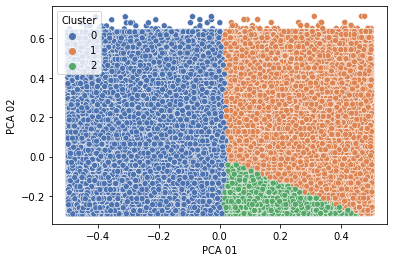

In [ ]:
pca = PCA(n_components=2)
TEMP_ConcatDataset = ConcatDataset2.drop('Cluster', axis = 1)
label = ConcatDataset2['Cluster']
label = label.to_list()
pca = pca.fit_transform(TEMP_ConcatDataset)

data_frame = pd.DataFrame()

data_frame['PCA 01'] = pca[:,0]
data_frame['PCA 02'] = pca[:,1]
data_frame['Cluster'] = label

sns.scatterplot(data = data_frame, x = 'PCA 01' , y = 'PCA 02', hue='Cluster', palette='deep')

In [ ]:
list_ConcatDataset = [x for x in range(1,10)]
min_distance1 = []
elbow1 = 0

for k in list_ConcatDataset:

    Centroid = ConcatDataset2.sample(k)
    Centroid = Centroid.to_numpy()
    elbow1 = K_Means(ConcatDataset2, Centroid)
    min_distance1.append(elbow1)

min_distance1

[204995.68665698433,
 75179.203857258,
 58932.816553736375,
 98147.11482333182,
 126507.41495910818,
 122044.4592850119,
 73691.29852008128,
 83595.65258178565,
 52049.72328986488]

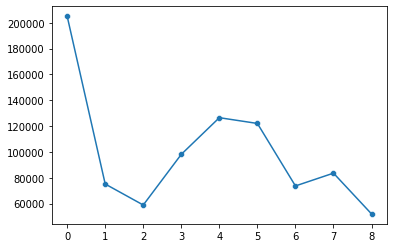

In [ ]:
sns.lineplot(data = min_distance1)
sns.scatterplot(data = min_distance1)

**JIKA LIST DATASET SEBELUM DI PCA**

In [ ]:
list_ConcatDataset2 = [x for x in range(1,10)]
min_distance2 = []
elbow2 = 0

for k in list_ConcatDataset2:

    Centroid = ConcatDataset2.sample(k)
    Centroid = Centroid.to_numpy()
    elbow2 = K_Means(ConcatDataset2, Centroid)
    min_distance2.append(elbow2)

min_distance2

[453085.4180211506,
 67033.94080797542,
 129434.02808728868,
 256729.6413027099,
 93258.70929728568,
 110733.33035895546,
 111266.27338519691,
 102014.52874103465,
 83711.42873589635]

**Visualisasi Elbow Method sebelum di PCA**

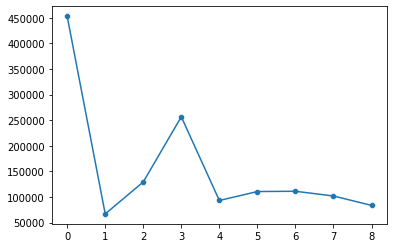

In [ ]:
sns.lineplot(data = min_distance2)
sns.scatterplot(data = min_distance2)

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


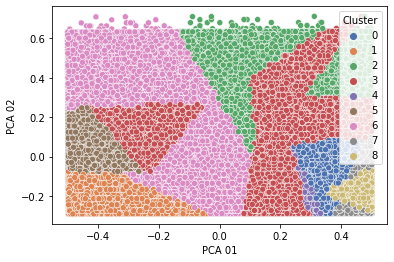

In [ ]:
pca = PCA(n_components=2)
TEMP_ConcatDataset = ConcatDataset2.drop('Cluster', axis = 1)
label = ConcatDataset2['Cluster']
label = label.to_list()
pca = pca.fit_transform(TEMP_ConcatDataset)

data_frame = pd.DataFrame()

data_frame['PCA 01'] = pca[:,0]
data_frame['PCA 02'] = pca[:,1]
data_frame['Cluster'] = label

sns.scatterplot(data = data_frame, x = 'PCA 01' , y = 'PCA 02', hue='Cluster', palette='deep')